<a href="https://colab.research.google.com/github/nicolegherrera/Github-Class/blob/main/Food_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work

## Import libraries

In [1]:
!pip install roboflow

In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [6]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.8/235.7 GB disk)


In [8]:
import os
HOME = os.getcwd()
print(HOME)

/content


### **Install YOLO V 11**

In [9]:
from ultralytics import YOLO
# Attempt to download the model weights if they don't exist locally
model = YOLO('yolo11n.pt')


100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import yaml

## Import dataset

Importing the dataset with the API generated by Roboflow with Mayra's account

In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="cBLWWZ4l2OGfXB6ucqNy")
project = rf.workspace("rahmanouri").project("objects_detection-t7zsg")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Objects_Detection--3 in yolov11:: 100%|██████████| 20674/20674 [00:04<00:00, 4717.89it/s]


In [12]:
print(f"✅ Dataset is located at: {dataset.location}")


✅ Dataset is located at: /content/datasets/Objects_Detection--3


Looking what is inside the path we imported.

#### Directory contents:
- 'valid': Directory containing validation images (images used to validate the model during training).
- 'README.dataset.txt': Text file with dataset-related information or instructions from Roboflow.
- 'train': Directory containing training images (images used to train the model).
- 'test': Directory containing test images (images used to evaluate the model's performance after training).
- 'data.yaml': YAML configuration file containing dataset-specific information such as class names, image size, etc.
- 'README.roboflow.txt': Text file with Roboflow-specific information or instructions, often regarding how the dataset was created or annotated.

In [13]:
dataset_path = "Objects_Detection--3"  # Adjust if necessary

if os.path.exists(dataset_path):
    print("Dataset directory exists!")
    print("Contents:")
    print(os.listdir(dataset_path))  # List files in the directory
else:
    print("Dataset directory not found!")

Dataset directory exists!
Contents:
['valid', 'test', 'data.yaml', 'train', 'README.roboflow.txt', 'README.dataset.txt']


The following code shows the number of elements in each folder.

In [14]:
def count_images(directory):
    """Count the number of image files in the given directory."""
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']  # List of common image file extensions
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

# Path to the dataset directory
dataset_path = "Objects_Detection--3"  # Adjust this if necessary

# Directories for each dataset split
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Counting images in each directory
train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)

# Display the counts
print(f"Train Set: {train_count} images")
print(f"Valid Set: {valid_count} images")
print(f"Test Set: {test_count} images")

Train Set: 9248 images
Valid Set: 667 images
Test Set: 416 images


With the following code the first images per each folder are displayed.

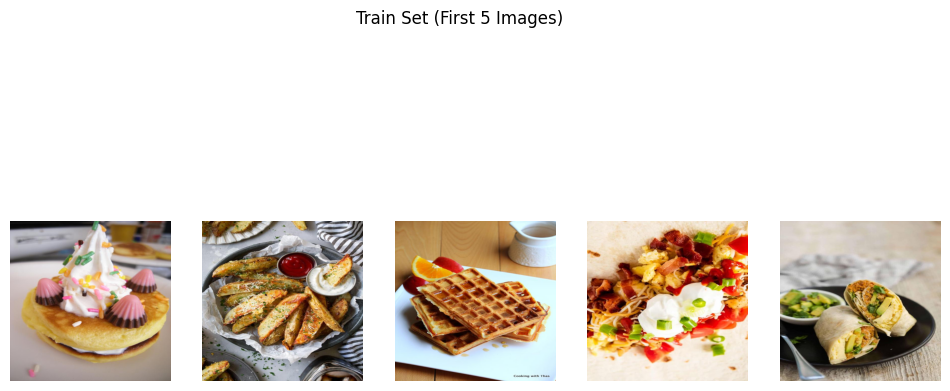

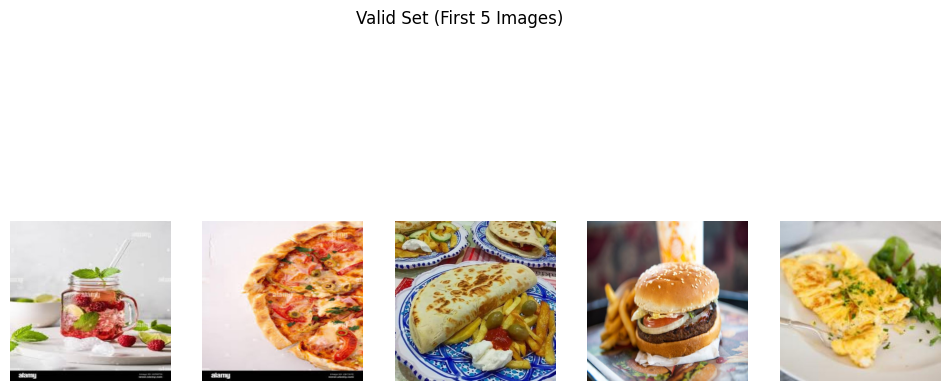

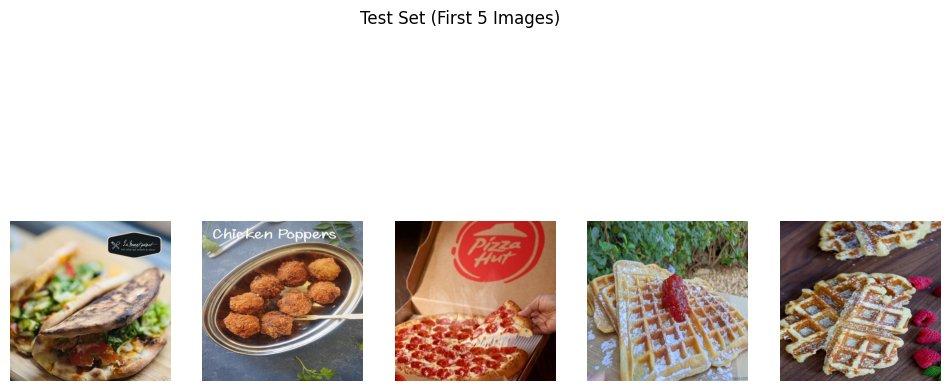

In [15]:
def display_first_few_images(directory, num_images=5):
    """Display the first few image files from the directory."""
    image_files = []
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

    # Collect all image files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(root, file))

    # Display the first `num_images` files
    return image_files[:num_images]

# Path to the dataset directory
dataset_path = "Objects_Detection--3"  # Adjust this if necessary

# Directories for each dataset split
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Get first few images from each directory
train_images = display_first_few_images(train_dir)
valid_images = display_first_few_images(valid_dir)
test_images = display_first_few_images(test_dir)

# Function to display images
def plot_images(image_paths, title="Images"):
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(image_paths):
        img = mpimg.imread(img_path)
        plt.subplot(1, len(image_paths), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display the first few images from each set
plot_images(train_images, "Train Set (First 5 Images)")
plot_images(valid_images, "Valid Set (First 5 Images)")
plot_images(test_images, "Test Set (First 5 Images)")

The following code shows the number and different categories we have in the dataset.

In [16]:
# Path to the data.yaml file
yaml_path = "Objects_Detection--3/data.yaml"  # Adjust if necessary

# Load the YAML file
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Display the dataset information
print("Dataset Information:")
print(f"- Number of Classes: {len(data_yaml['names'])}")
print(f"- Classes: {data_yaml['names']}")

Dataset Information:
- Number of Classes: 42
- Classes: ['05L_Watter', 'Baguette_Farcie', 'Brownies', 'Burritos', 'Chesse_BreadSticks', 'Chichen_Poppers', 'Chicken Nugget', 'Chicken wing', 'Chicken_Poppers', 'Citronade', 'Coca_bottle', 'Fajitas', 'Fanta_Canette', 'Fanta_botlleS', 'Frittes', 'Garlic_BreadSticks', 'Humbrger', 'Jus_Kiwi', 'Jus_fraise', 'Large_pizza', 'Makloub', 'Medium_pizza', 'MilkChake', 'Mojito', 'Omelette', 'Pancake', 'Peperoni_Rolls', 'Pepsi', 'Potato_Wedges', 'Quesdillas', 'Salade', 'Smal_pizza', 'Tacos', 'Tacos_Mexicain', 'The', 'coca_Canette', 'crepes', 'croissant', 'orange-juice', 'pizza_meter', 'sprite', 'waffles']


In [17]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Objects_Detection--3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

In [25]:
!ls -lh runs/detect/train


total 8.0K
-rw-r--r-- 1 root root 1.6K Feb  8 10:07 args.yaml
drwxr-xr-x 2 root root 4.0K Feb  8 10:07 weights


In [26]:
!find runs/ -name "*.pt"


runs/detect/train2/weights/last.pt
runs/detect/train2/weights/best.pt


In [27]:
!cat runs/detect/train/args.yaml


task: detect
mode: train
model: yolo11s.pt
data: Objects_Detection--3/dataset.yaml
epochs: 50
time: null
patience: 100
batch: 16
imgsz: 640
save: true
save_period: -1
cache: false
device: null
workers: 8
project: null
name: train
exist_ok: false
pretrained: true
optimizer: auto
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 10
resume: false
amp: true
fraction: 1.0
profile: false
freeze: null
multi_scale: false
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
save_hybrid: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
vid_stride: 1
stream_buffer: false
visualize: false
augment: false
agnostic_nms: false
classes: null
retina_masks: false
embed: null
show: false
save_frames: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
show_boxes: true
line_width: null
format: torchscript
keras: false
optimize: false
int8: false
dynami

In [30]:
!find runs/ -name "*.pt"

runs/detect/train2/weights/last.pt
runs/detect/train2/weights/best.pt


In [31]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,429,054 parameters, 0 gradients, 21.4 GFLOPs
val: Scanning /content/datasets/Objects_Detection--3/valid/labels.cache... 667 images, 1 backgrounds, 0 corrupt: 100% 667/667 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 452, len(boxes) = 1315. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 42/42 [00:10<00:00,  4.03it/s]
                   all        667       1315      0.718      0.648      0.698      0.523
            05L_Watter         36        112      0.791      0.743      0.779      0.347
       Baguette_Farcie         16         25      0.418       0.88      0.693      0.546
              Burritos   

In [32]:
!ls {HOME}/runs/detect/train2/

args.yaml					     PR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			     R_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				     results.csv	    val_batch1_pred.jpg
events.out.tfevents.1739012852.a0fcebc30ef8.26045.0  results.png	    val_batch2_labels.jpg
F1_curve.png					     train_batch0.jpg	    val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg	    weights
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


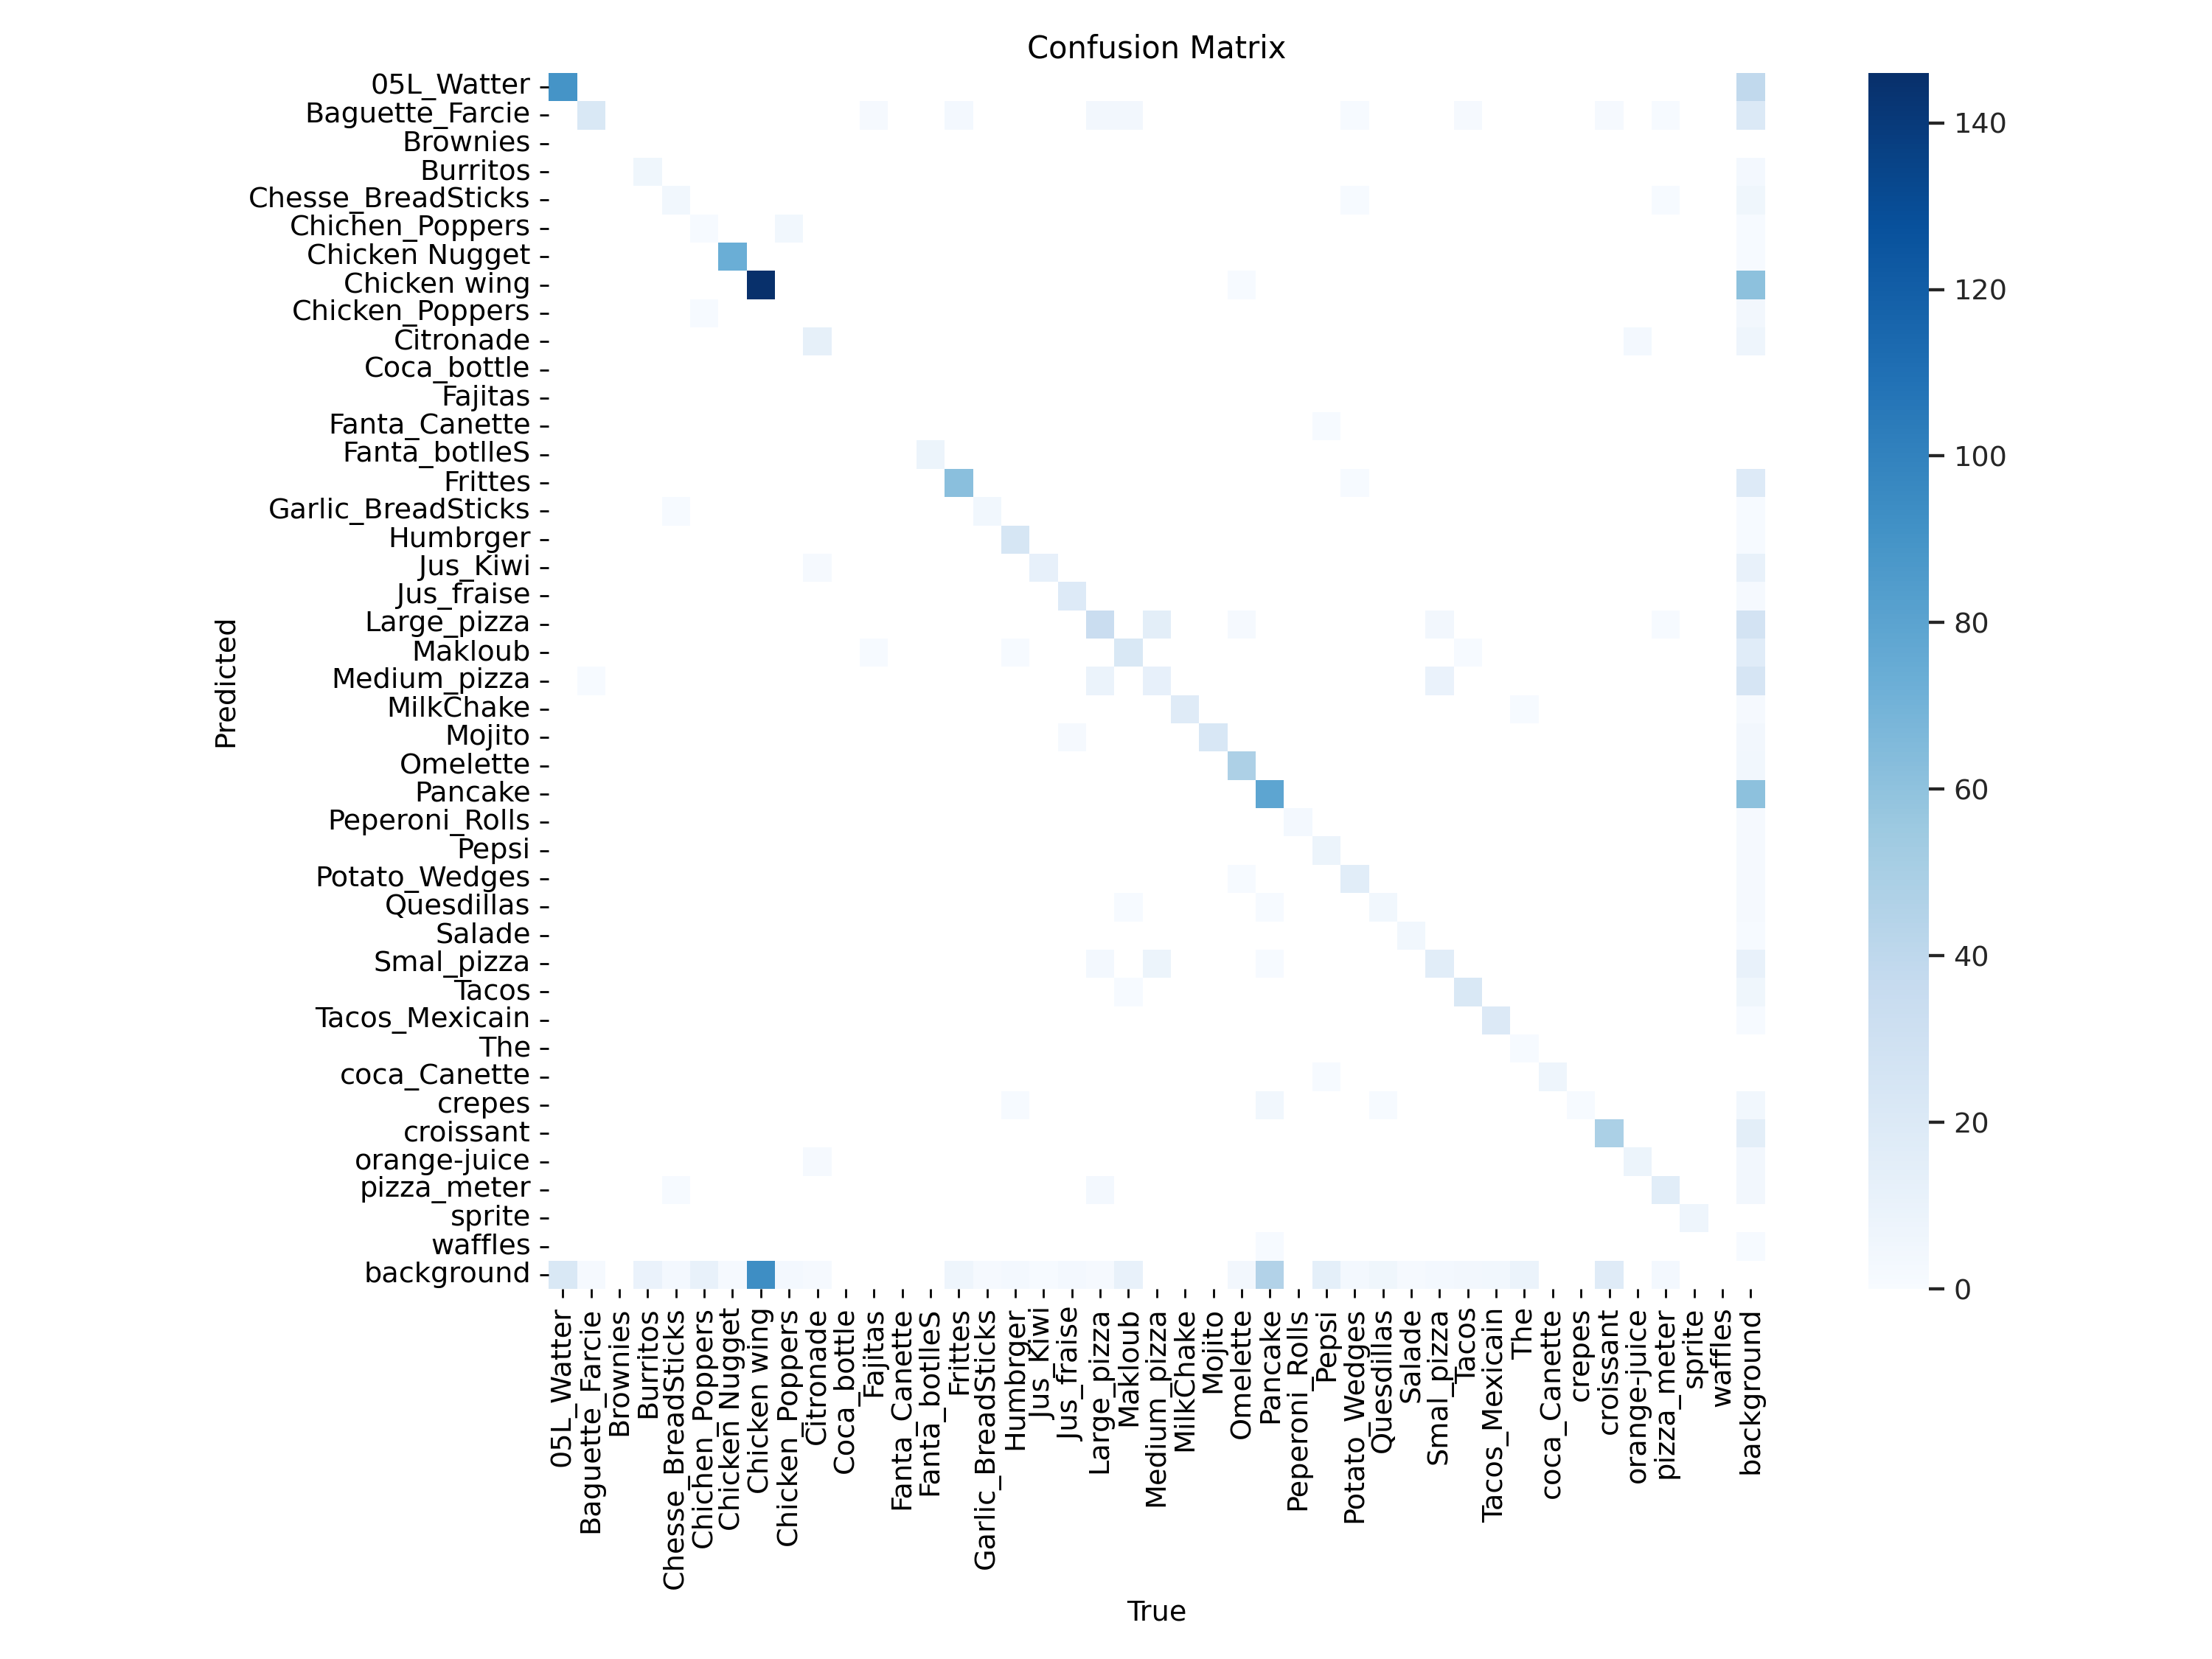

In [36]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=900)

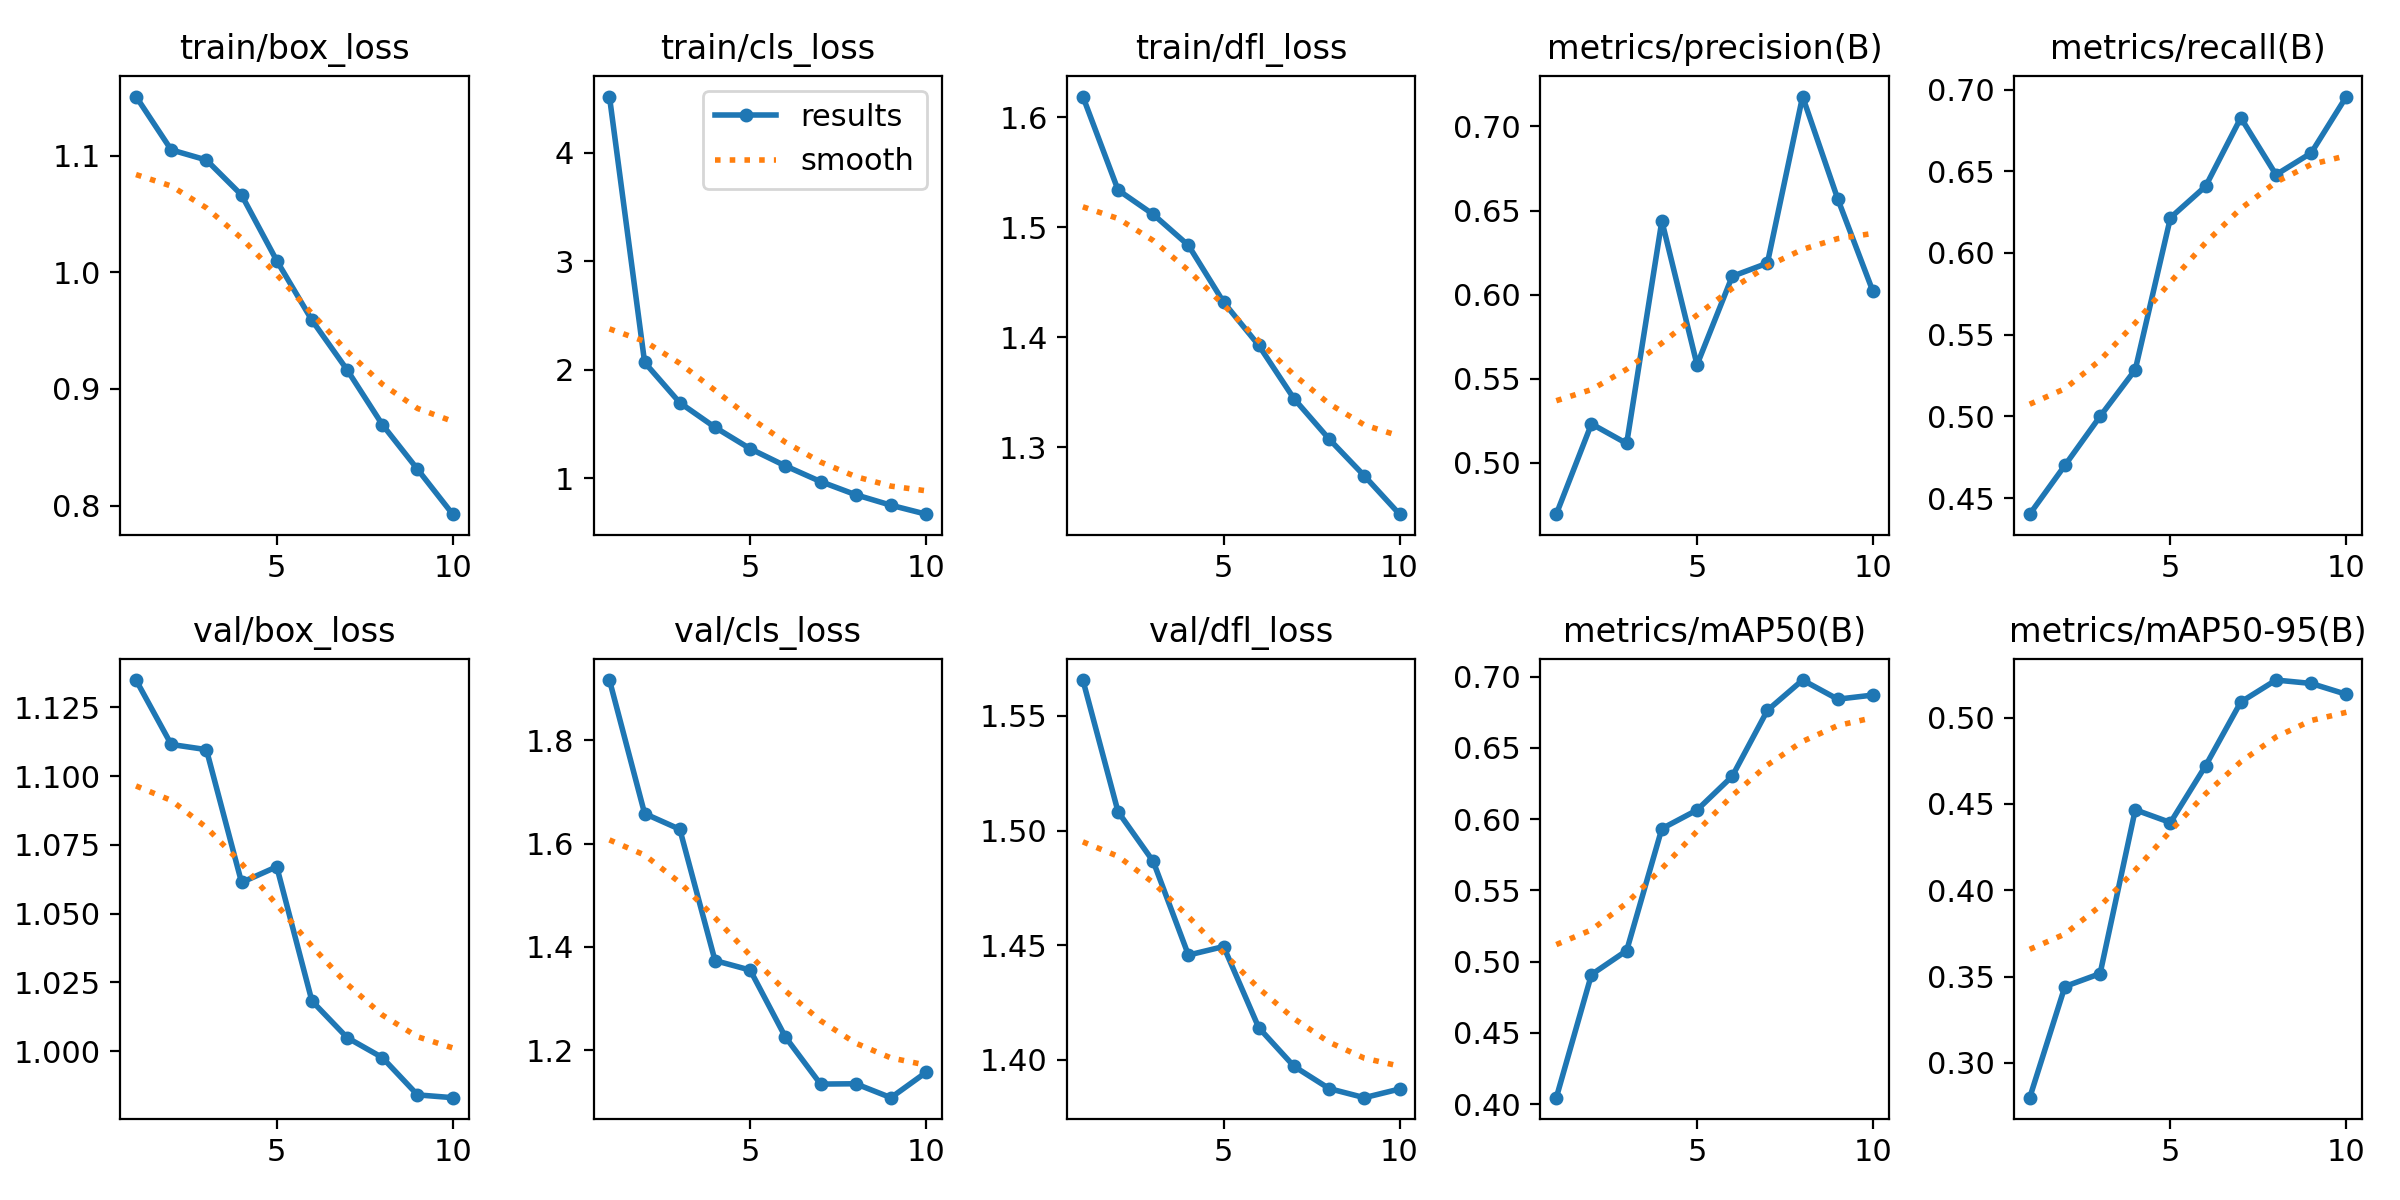

In [35]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/results.png', width=900)

In [21]:
# Load and print dataset.yaml
dataset_yaml_path = "Objects_Detection--3/dataset.yaml"

with open(dataset_yaml_path, "r") as file:
    dataset_yaml = yaml.safe_load(file)

print(f"✅ Dataset YAML Loaded Successfully!")
print(f"- Train Path: {dataset_yaml['train']}")
print(f"- Valid Path: {dataset_yaml['val']}")
print(f"- Number of Classes: {dataset_yaml['nc']}")
print(f"- Classes: {dataset_yaml['names']}")

✅ Dataset YAML Loaded Successfully!
- Train Path: Objects_Detection--3/train/images
- Valid Path: Objects_Detection--3/valid/images
- Number of Classes: 42
- Classes: ['05L_Watter', 'Baguette_Farcie', 'Brownies', 'Burritos', 'Chesse_BreadSticks', 'Chichen_Poppers', 'Chicken Nugget', 'Chicken wing', 'Chicken_Poppers', 'Citronade', 'Coca_bottle', 'Fajitas', 'Fanta_Canette', 'Fanta_botlleS', 'Frittes', 'Garlic_BreadSticks', 'Humbrger', 'Jus_Kiwi', 'Jus_fraise', 'Large_pizza', 'Makloub', 'Medium_pizza', 'MilkChake', 'Mojito', 'Omelette', 'Pancake', 'Peperoni_Rolls', 'Pepsi', 'Potato_Wedges', 'Quesdillas', 'Salade', 'Smal_pizza', 'Tacos', 'Tacos_Mexicain', 'The', 'coca_Canette', 'crepes', 'croissant', 'orange-juice', 'pizza_meter', 'sprite', 'waffles']


In [ ]:
print ("test chris")

test chris
